# Proyecto Grupal - Etapa 04: Limpieza de Datos
Autores:
Camila de la Paz
Daniel E. Ramírez
Franco Pes
Xavier Vidman

El presente archivo compila la tercera etapa del primer proyecto grupal de la carrera de Data Science de Henry, un análisis exploratorio sobre los datos proporcionados. Esta etapa se divide, a su vez, en los pasos que se detallan a continuación:
1. Importación de liberías a utilizar
2. Carga de datos
3. Descripción y análisis de los datos

### Paso 1: Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### Paso 2: Carga de datos


In [2]:
df = pd.read_parquet ('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-01.parquet')

### Paso 3: Descripción y análisis
Información general

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN


In [ ]:
# Función para crear clave subrrogada
df.time.dt.strftime('%Y%m%d%H') + df.id_borough.astype(str)

In [3]:
df.drop(columns=['congestion_surcharge','airport_fee'],inplace=True)

Valores negativos convertidos a positivos

In [4]:
df.fare_amount = df.fare_amount.abs()
df.extra = df.extra.abs()
df.mta_tax = df.mta_tax.abs()
df.tip_amount = df.tip_amount.abs()
df.tolls_amount = df.tolls_amount.abs()
df.improvement_surcharge = df.improvement_surcharge.abs()
df.total_amount = df.total_amount.abs()

In [5]:
df['fare_per_mile'] = df.fare_amount / df.trip_distance

In [12]:
df.fare_per_mile[df.fare_per_mile > 100000] = 0

C:\Users\urbda\AppData\Local\Temp\ipykernel_12780\956704063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fare_per_mile[df.fare_per_mile > 100000] = 0


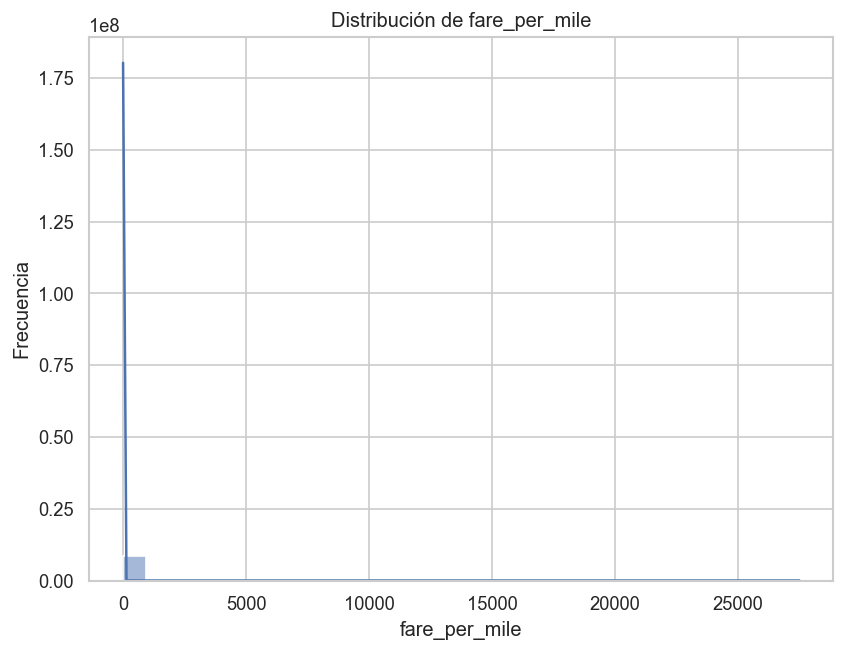

In [34]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_per_mile',data=df[df.fare_per_mile > 0],bins=30,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de fare_per_mile')
plt.show()

In [15]:
IQR = df.fare_per_mile.quantile(.75) - df.fare_per_mile.quantile(.25)
min = df.fare_per_mile.quantile(.25) - (1.5 * IQR)
max = df.fare_per_mile.quantile(.75) + (1.5 * IQR)

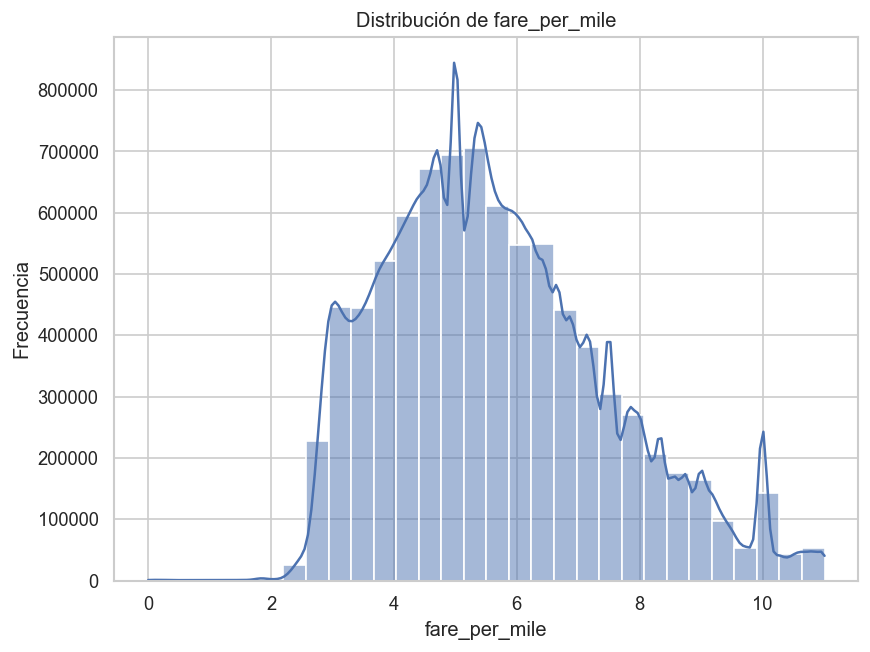

In [16]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_per_mile',data=df[(df.fare_per_mile > 0) & (df.fare_per_mile <= max)],bins=30,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de fare_per_mile')
plt.show()

In [18]:
max

11.009615384615385

In [19]:
min

0.3173076923076916

In [35]:
df[df.fare_per_mile > 5000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,fare_per_mile
9476,2,2018-01-01 00:28:15,2018-01-01 00:28:20,5,0.01,2,N,79,79,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,5200.0
14025,2,2018-01-01 00:15:50,2018-01-01 00:15:55,2,0.01,5,N,186,186,1,155.0,0.0,0.5,0.00,0.0,0.3,155.80,15500.0
37096,2,2018-01-01 02:24:25,2018-01-01 02:24:28,1,0.01,2,N,264,170,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,5200.0
46658,2,2018-01-01 02:59:17,2018-01-01 02:59:21,1,0.01,2,N,164,164,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,5200.0
53014,2,2018-01-01 03:12:31,2018-01-01 03:12:36,2,0.01,5,N,264,265,1,65.0,0.0,0.0,13.06,0.0,0.3,78.36,6500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686471,2,2018-01-31 19:15:25,2018-01-31 19:15:33,1,0.01,2,N,163,230,2,52.0,4.5,0.5,0.00,0.0,0.3,57.30,5200.0
8690034,2,2018-01-31 19:52:47,2018-01-31 19:53:29,1,0.01,2,N,100,164,2,52.0,4.5,0.5,0.00,0.0,0.3,57.30,5200.0
8716069,2,2018-01-31 21:04:07,2018-01-31 21:04:21,1,0.01,2,N,257,257,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,5200.0
8733045,2,2018-01-31 22:05:05,2018-01-31 22:05:25,1,0.01,5,N,265,265,1,100.0,0.0,0.5,20.00,10.5,0.3,131.30,10000.0


In [27]:
df[df.fare_per_mile == 37500].fare_per_mile = 0

C:\Users\urbda\AppData\Local\Temp\ipykernel_12780\1807866613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.fare_per_mile == 37500].fare_per_mile = 0


In [30]:
df.iloc[6907864].fare_per_mile = 0

C:\Users\urbda\AppData\Local\Temp\ipykernel_12780\2030423808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[6907864].fare_per_mile = 0


In [33]:
df.iloc[6907864,17] = 0

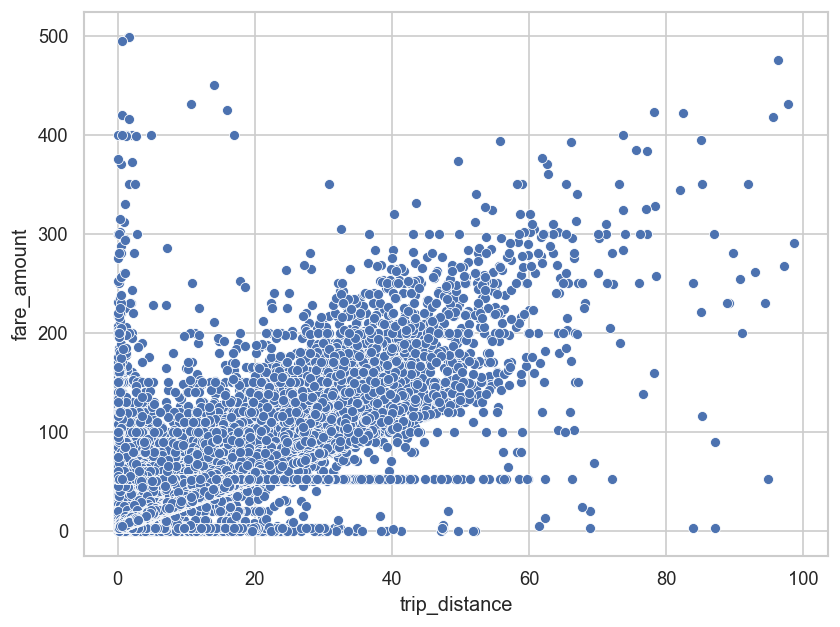

In [48]:
# [(df.trip_distance < 10) & (df.fare_amount < 100)]
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_distance',y = 'fare_amount', data=df[(df.trip_distance > 0) & (df.trip_distance < 100) & (df.fare_amount > 0) & (df.fare_amount < 500)])
plt.show()

In [49]:
df[(df.fare_amount > 400) & (df.trip_distance < 20)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,fare_per_mile
75227,1,2018-01-01 05:16:36,2018-01-01 05:17:16,1,0.00,5,N,265,265,4,520.00,0.00,0.00,0.0,0.00,0.3,520.30,0.000000
240052,2,2018-01-02 00:41:32,2018-01-02 00:41:58,1,0.00,5,N,216,216,1,440.00,0.00,0.00,0.0,0.00,0.3,440.30,0.000000
255710,1,2018-01-02 07:07:23,2018-01-02 07:07:53,1,0.00,5,N,145,145,2,588.85,0.00,0.00,0.0,0.00,0.3,589.15,0.000000
447230,1,2018-01-02 21:34:17,2018-01-02 21:36:04,4,0.00,5,N,265,265,3,888.00,0.00,0.00,0.0,0.00,0.3,888.30,0.000000
753038,1,2018-01-04 03:11:59,2018-01-04 03:12:42,1,1.50,5,N,226,226,1,499.00,0.00,0.00,0.0,0.00,0.3,499.30,332.666667
753039,1,2018-01-04 03:13:50,2018-01-04 03:14:22,1,1.50,5,N,226,226,1,499.00,0.00,0.00,0.0,0.00,0.3,499.30,332.666667
867944,2,2018-01-05 00:28:16,2018-01-05 00:28:19,2,0.00,5,N,265,265,1,410.00,0.00,0.00,0.0,0.00,0.3,410.30,0.000000
875746,1,2018-01-05 05:10:10,2018-01-05 05:10:39,2,0.00,5,N,265,265,1,430.00,0.00,0.00,0.0,0.00,0.3,430.30,0.000000
984654,2,2018-01-05 14:30:05,2018-01-05 14:30:08,2,0.00,5,N,265,265,1,450.00,0.00,0.50,0.0,0.00,0.3,450.80,0.000000
984655,2,2018-01-05 14:31:39,2018-01-05 14:31:41,2,0.00,5,N,265,265,1,425.00,0.00,0.50,0.0,0.00,0.3,425.80,0.000000
